# Домашнее задание № 6

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [8]:
# посмотрим, что это такое
type(housing)

sklearn.utils._bunch.Bunch

In [9]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [11]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [12]:
# преобразую data в уже привычный мне df
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
# Целевая переменная – MedHouseVal
target = pd.DataFrame(housing.target, columns=housing.target_names)
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
df = pd.DataFrame(housing.frame)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
# проверим на пропуски
filtered_df = df[df.isna().any(axis=1)]
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


будем считать, что этот тип данных я тоже освоил)

In [17]:
data_processed = df

In [18]:
data_processed.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Поля данных в наборе California housing dataset, загружаемом с помощью функции fetch_california_housing(), означают следующее:
1. MedInc — средний доход в группе блоков;
2. HouseAge — средний возраст дома в группе блоков;
3. AveRooms — среднее количество комнат на домохозяйство;
4. AveBedrms — среднее количество спален на домохозяйство;
5. Population — население группы блоков;
6. AveOccup — среднее количество членов домохозяйства;
7. Latitude — широта группы блоков;
8. Longitude — долгота группы блоков.

MedHouseVal - Целевая переменная — средняя стоимость дома в округах Калифорнии, выраженная в сотнях тысяч долларов

Будем использовать линейную регрессию для тестирования качества данных

In [187]:
from sklearn.preprocessing import StandardScaler

def get_score(X,y, random_seed=42, model=None):

    tmp_columns = list(X.columns.values[~np.isin(X.columns.values, 'MedHouseVal')])
    X = X[tmp_columns]

    if model is None:
       model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [21]:
# с этой колонкой будем работать
tmp_columns = columns
tmp_columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

посмотрим, что мы получим на не обработанных данных

In [189]:
get_score(data_processed, data_processed['MedHouseVal'])

0.575787706032451

чуть лучше, чем просто монетку подбрасывать

# 1 MedInc — средний доход в группе блоков

In [190]:
tmp = data_processed.copy()
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [191]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])

"""
def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    """

'\ndef get_pairplot(X, columns=None):\n    if columns is None:\n        columns = list(X.columns)\n    sns.pairplot(X[columns])\n    '

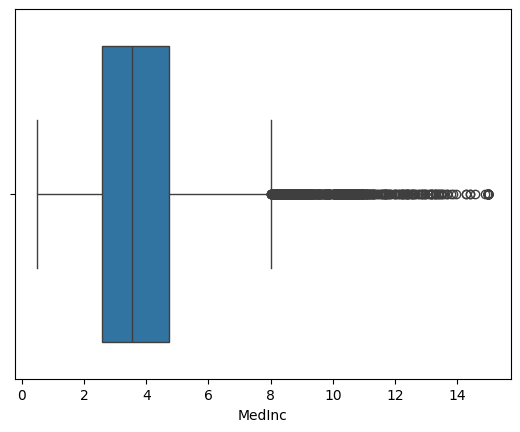

In [192]:
get_boxplot(tmp, columns=['MedInc'])

проверим значения больше 8

In [193]:
tmp[tmp['MedInc'] > 8].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.926
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19,3.352
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.512


Ни каких видимых отклонений я не обноружил.
Единственное объяснение - зависимость от района проживания.
Придется в первую очерель обратиться к геоданным.

# Первоначальная работа с геоданными

По данным Википедии Калифорния разделена на 58 округов.

In [194]:
from sklearn.cluster import DBSCAN, KMeans

In [195]:
# разделим наши геоданные на 58 кластеров
# решение не идеальное, но вполне объяснимое -
# наши данные будут группироваться по географическому признаку
# сопостовимому с административным устройством
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=58)
cluster = kmeans.fit_predict(data_processed[['Latitude', 'Longitude']])
cluster

array([49, 49, 49, ...,  6,  6,  6], dtype=int32)

In [196]:
# посмотрим на уникальнын значения в наших кластерах
unique, frequency = np.unique(cluster,
                              return_counts = True)
print("Unique Values:", unique)
print("Frequency Values:", frequency)

Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
Frequency Values: [1451  825  334 1181  133  239  180  430 1155  599  156  152  112  382
  342  297  460  137  166  111  166  217  857  422  357  226   36   24
  454  220   67  395  575  424  272  148   80   37   22  141  112   33
   37 1256  172  193  213  833  426  804  137  460  210  105  127 1218
   12  310]


In [197]:
tmp['cluster'] = cluster
tmp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,49
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,49
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,49
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,49
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,49
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,44
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,6
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,6
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,6


Посмотрим (выборочно) что дали кластеры для анализа выбросов

cluster  7


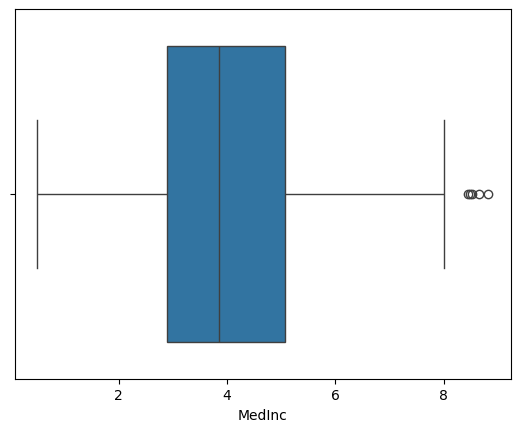

In [205]:
rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
get_boxplot(tmp[tmp['cluster'] == int(rand_int)], columns=['MedInc'])

В итоге, по кластерам стало лучше. Но не сильно. Пока оставим так

In [206]:
# посмотрим на результат
get_score(tmp, tmp['MedHouseVal'])

0.5760570007083643

In [186]:
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,10
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,10
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,10
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,10
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,10


Чуть чуть получше

преобразуем параметр cluster

In [144]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [145]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.count import CountEncoder

# функции для обработки категорий

def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each)
        X = pd.concat([X, dummies], axis=1)
    return X

def get_label(X, cols):
    X = X.copy()
    for each in cols:
        le = LabelEncoder()
        labels = le.fit_transform(X[each])
        X[each] = labels
    return X

def get_count(X, cols):
    X = X.copy()

    for col in cols:
        X[col] = X[col].astype('str')

    ce = CountEncoder(handle_unknown=-1)
    ce.fit(X[cols])
    X[cols] = ce.transform(X[cols])
    return X

In [207]:
# попробуем представить наши кластеры по другому
tmp = get_one_hot(tmp, cols=['cluster'])
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,49,...,False,True,False,False,False,False,False,False,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,49,...,False,True,False,False,False,False,False,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,49,...,False,True,False,False,False,False,False,False,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,49,...,False,True,False,False,False,False,False,False,False,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,49,...,False,True,False,False,False,False,False,False,False,False


In [208]:
get_score(tmp, tmp['MedHouseVal'])

0.6603436435667484

уже лучше

In [209]:
# сохраним полученные данные
data_processed = tmp.copy()
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,49,...,False,True,False,False,False,False,False,False,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,49,...,False,True,False,False,False,False,False,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,49,...,False,True,False,False,False,False,False,False,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,49,...,False,True,False,False,False,False,False,False,False,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,49,...,False,True,False,False,False,False,False,False,False,False


Попробую добавить столбец с frequency.
Логика такая: если объектов там больше то и привлекательность этого кластера выше



In [212]:
tmp['frequency'] = np.nan
for i, value in enumerate(frequency):
  tmp['frequency'] = tmp['frequency'].mask(tmp['cluster'] == i, value)
tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,...,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,49,...,True,False,False,False,False,False,False,False,False,804.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,49,...,True,False,False,False,False,False,False,False,False,804.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,49,...,True,False,False,False,False,False,False,False,False,804.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,49,...,True,False,False,False,False,False,False,False,False,804.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,49,...,True,False,False,False,False,False,False,False,False,804.0


In [213]:
get_score(tmp, tmp['MedHouseVal'])

0.6660344606670252

прошлое значение - 0.6603436435667484

построим MedInc - MedHouseVal

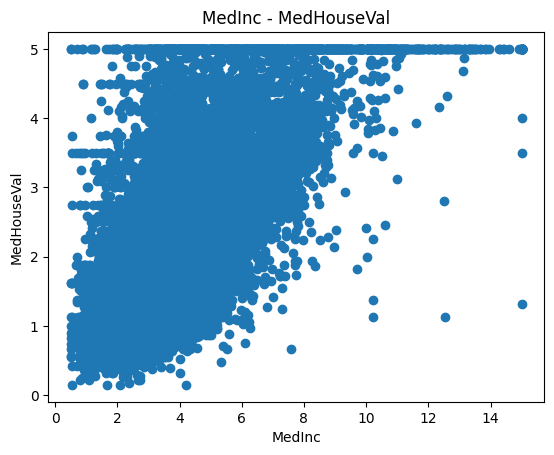

In [235]:
plt.scatter(tmp['MedInc'], tmp['MedHouseVal'])
plt.title('MedInc - MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()
plt.show()

На некоторых графиках видна четкая линия (большое скопление точек) сверху. Но ее смысл я не могу понять

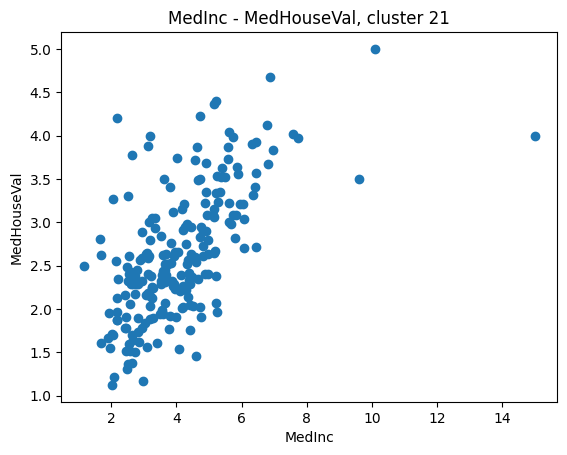

In [239]:
# и тоже по случайному кластеру
rand_int = np.random.randint(0, 58)
tmp_ = tmp[tmp['cluster'] == rand_int]
plt.scatter(tmp_['MedInc'], tmp_['MedHouseVal'])
plt.title('MedInc - MedHouseVal, cluster {}'.format(rand_int))
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()
plt.show()

cluster  19


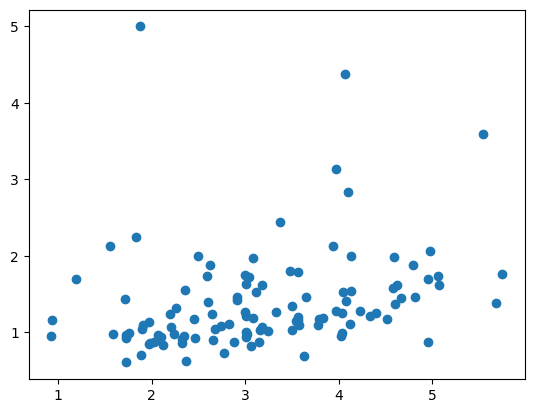

In [234]:
# или так

rand_int = np.random.randint(0, 58)
print ('cluster ', rand_int)
tmp_ = tmp[tmp['cluster'] == rand_int]
#tmp_.plot(x='MedInc', y='MedHouseVal', xlabel='MedInc', ylabel='MedHouseVal')
#plt.show()


plt.scatter(tmp_['MedInc'], tmp_['MedHouseVal'])
plt.show()

пока ни какой значимой зависимости не увидел